In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df_copy = df.copy()
df_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_copy = df_copy[df_copy['Age'] <= 38]
df_copy = df_copy[df_copy['Fare'] <= 31]

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  410 non-null    int64  
 1   Survived     410 non-null    int64  
 2   Pclass       410 non-null    int64  
 3   Name         410 non-null    object 
 4   Sex          410 non-null    object 
 5   Age          410 non-null    float64
 6   SibSp        410 non-null    int64  
 7   Parch        410 non-null    int64  
 8   Ticket       410 non-null    object 
 9   Fare         410 non-null    float64
 10  Cabin        33 non-null     object 
 11  Embarked     410 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 41.6+ KB


In [6]:
df_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,445.768293,0.353659,2.636585,23.510366,0.387805,0.287805,13.337925
std,264.116533,0.478689,0.561284,8.877024,0.758552,0.621614,7.184781
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,212.250000,0.000000,2.000000,19.000000,0.000000,0.000000,7.895800
50%,432.500000,0.000000,3.000000,24.000000,0.000000,0.000000,10.500000
75%,677.750000,1.000000,3.000000,30.000000,1.000000,0.000000,17.225000
max,891.000000,1.000000,3.000000,38.000000,4.000000,4.000000,31.000000


In [12]:
data = df_copy[['Age','Fare']]
n = [1,2,4,8,16]
res = []
for i in n:
    clf = KMeans(n_clusters=2, precompute_distances=False, n_init=i)
    labels = clf.fit(data).labels_
    res.append(labels)

/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/usr/local/var/pyenv/versions/3.7.6/lib/python3.

In [10]:
from matplotlib import pyplot as plt

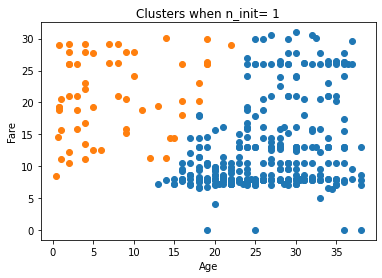

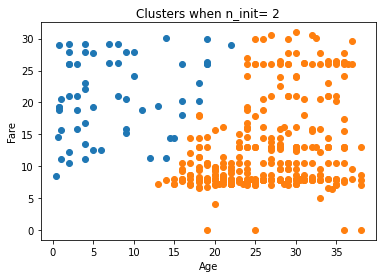

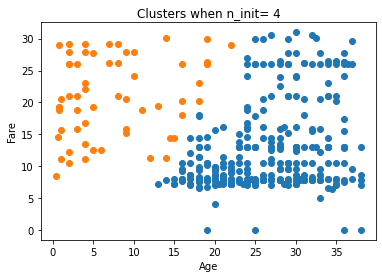

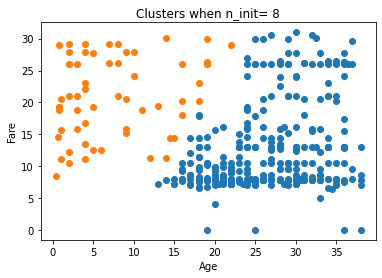

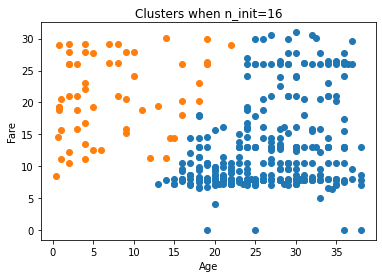

In [21]:
for i in range(len(n)):
    plt.figure()
    plt.title(f'Clusters when n_init={n[i]:2d}')
    plt.scatter(x=data[res[i]==0]['Age'], y=data[res[i]==0]['Fare'])
    plt.scatter(x=data[res[i]==1]['Age'], y=data[res[i]==1]['Fare'])
    plt.xlabel('Age', fontsize=10)
    plt.ylabel('Fare', fontsize=10)

plt.show()

Enter n_init value (0: exit):1


/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


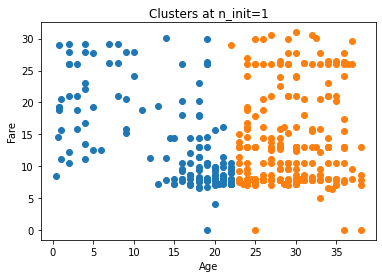

Enter n_init value (0: exit):4


/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


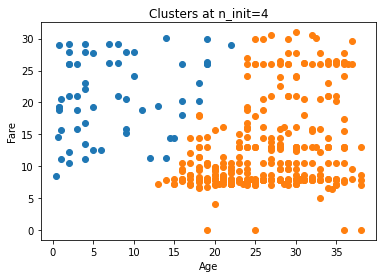

Enter n_init value (0: exit):8


/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


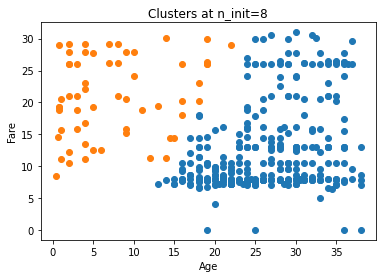

Enter n_init value (0: exit):16


/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


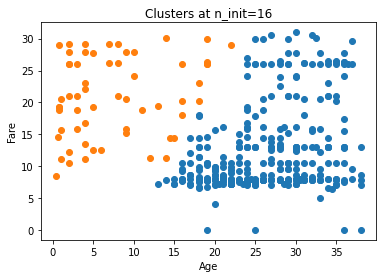

Enter n_init value (0: exit):50


/usr/local/var/pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)


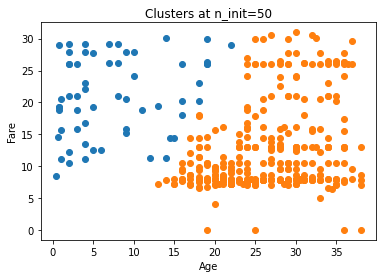

Enter n_init value (0: exit):0
Exit.


In [22]:
data = df_copy[['Age','Fare']]
while(1):
    val = int(input('Enter n_init value (0: exit):'))
    if val == 0:
        print('Exit.')
        break
    clf = KMeans(n_clusters=2, precompute_distances=False, n_init=val)
    labels = clf.fit(data).labels_
    
    plt.figure()
    plt.title(f'Clusters at n_init={val}')
    plt.scatter(x=data[labels==0]['Age'], y=data[labels==0]['Fare'])
    plt.scatter(x=data[labels==1]['Age'], y=data[labels==1]['Fare'])
    plt.xlabel('Age', fontsize=10)
    plt.ylabel('Fare', fontsize=10)
    plt.show()